In [ ]:
import pandas as pd
import numpy as np
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")
display(matches.head())
display(deliveries.head())

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


**DETECTING MISSING VALUES**

In [ ]:
print("Missing Values in Matches Dataset:")
print(matches.isnull().sum())
print("\nMissing Values in Deliveries Dataset:")
print(deliveries.isnull().sum())

Missing Values in Matches Dataset:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
f

**HANDLING MISSING VALUES**

In [ ]:
#For matches dataset
matches.update(matches[['city', 'player_of_match', 'winner', 'method']].fillna({
    'city': 'Unknown',
    'player_of_match': 'No Award',
    'winner': 'No Result',
    'method': 'Normal'
}))
matches.update(matches[['result_margin', 'target_runs', 'target_overs']].fillna(0))
print("Missing Values in Matches Dataset After Cleaning:")
print(matches.isnull().sum())

Missing Values in Matches Dataset After Cleaning:
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64


In [ ]:
#For deliveries dataset
deliveries.update(deliveries[['non_striker', 'extras_type', 'player_dismissed',
                              'dismissal_kind', 'fielder']].fillna({
    'non_striker': 'Unknown',
    'extras_type': 'No Extras',
    'player_dismissed': 'Not Out',
    'dismissal_kind': 'Not Out',
    'fielder': 'Not Out'
}))
deliveries.update(deliveries[['batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].fillna(0))
print("Missing Values in Deliveries Dataset After Cleaning:")
print(deliveries.isnull().sum())

Missing Values in Deliveries Dataset After Cleaning:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


**HANDLING OUTLIERS**

In [ ]:
import pandas as pd
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
columns_to_clean = ['result_margin', 'target_runs', 'target_overs']
for col in columns_to_clean:
    matches = remove_outliers(matches, col)
print("Remaining matches data:", matches.shape)

Remaining matches data: (921, 20)


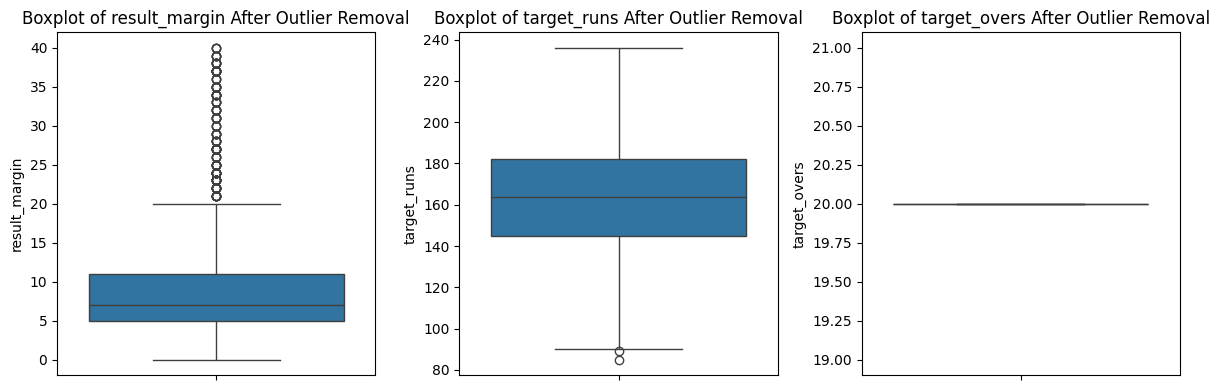

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns that exist in the dataset
columns_to_clean = ['result_margin', 'target_runs', 'target_overs']

# Ensure columns exist in the dataset
columns_to_clean = [col for col in columns_to_clean if col in matches.columns]

# Plot boxplots
plt.figure(figsize=(12, 4))  # Adjusted size
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(1, len(columns_to_clean), i)  # Adjust subplot dynamically
    sns.boxplot(y=matches[col])
    plt.title(f'Boxplot of {col} After Outlier Removal')

plt.tight_layout()
plt.show()


**SAVING CLEANED DATASETS**

In [ ]:
matches.to_csv("matches_cleaned.csv", index=False)
deliveries.to_csv("deliveries_cleaned.csv", index=False)

**FEATURE ENGINEERING**

In [ ]:
import pandas as pd
matches = pd.read_csv("matches_cleaned.csv")
deliveries = pd.read_csv("deliveries_cleaned.csv")

###Calculate Matches Played & Wins for Each Team ###
team_stats = matches.groupby('winner').size().reset_index(name='wins')
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
matches_played = matches_played.reset_index()
matches_played.columns = ['team', 'matches_played']
team_stats = team_stats.merge(matches_played, left_on='winner', right_on='team', how='right').fillna(0)

# Calculate win percentage
team_stats['win_percentage'] = (team_stats['wins'] / team_stats['matches_played']) * 100

###Run Rate & Economy Rate ###
# Total runs per team
total_runs_scored = deliveries.groupby('batting_team')['total_runs'].sum()
total_runs_conceded = deliveries.groupby('bowling_team')['total_runs'].sum()
total_overs_faced = deliveries.groupby('batting_team')['over'].count() / 6
total_overs_bowled = deliveries.groupby('bowling_team')['over'].count() / 6

# Run Rate (RR) = Total Runs Scored / Overs Faced
team_stats['run_rate'] = (total_runs_scored / total_overs_faced).reset_index(drop=True)

# Economy Rate (ER) = Total Runs Conceded / Overs Bowled
team_stats['economy_rate'] = (total_runs_conceded / total_overs_bowled).reset_index(drop=True)

###Highest & Lowest Scores ###
highest_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = highest_scores.groupby('batting_team')['total_runs'].agg(['max', 'min']).reset_index()
highest_scores.columns = ['team', 'highest_score', 'lowest_score']
team_stats = team_stats.merge(highest_scores, left_on='team', right_on='team', how='left')

### Total 4s and 6s ###
fours_sixes = deliveries[deliveries['batsman_runs'].isin([4, 6])].groupby(['batting_team', 'batsman_runs']).size().unstack(fill_value=0)
fours_sixes.columns = ['total_4s', 'total_6s']
team_stats = team_stats.merge(fours_sixes, left_on='team', right_index=True, how='left')

###Powerplay & Death Overs Performance ###
# Powerplay: Overs 1-6, Death Overs: Overs 16-20
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby('batting_team')['total_runs'].mean()
death_overs_scores = deliveries[(deliveries['over'] >= 16)].groupby('batting_team')['total_runs'].mean()
team_stats['powerplay_avg'] = powerplay_scores.reset_index(drop=True)
team_stats['death_overs_avg'] = death_overs_scores.reset_index(drop=True)

# Save the new dataset
team_stats.to_csv("team_features.csv", index=False)

**TEAM PERFORMANCE**

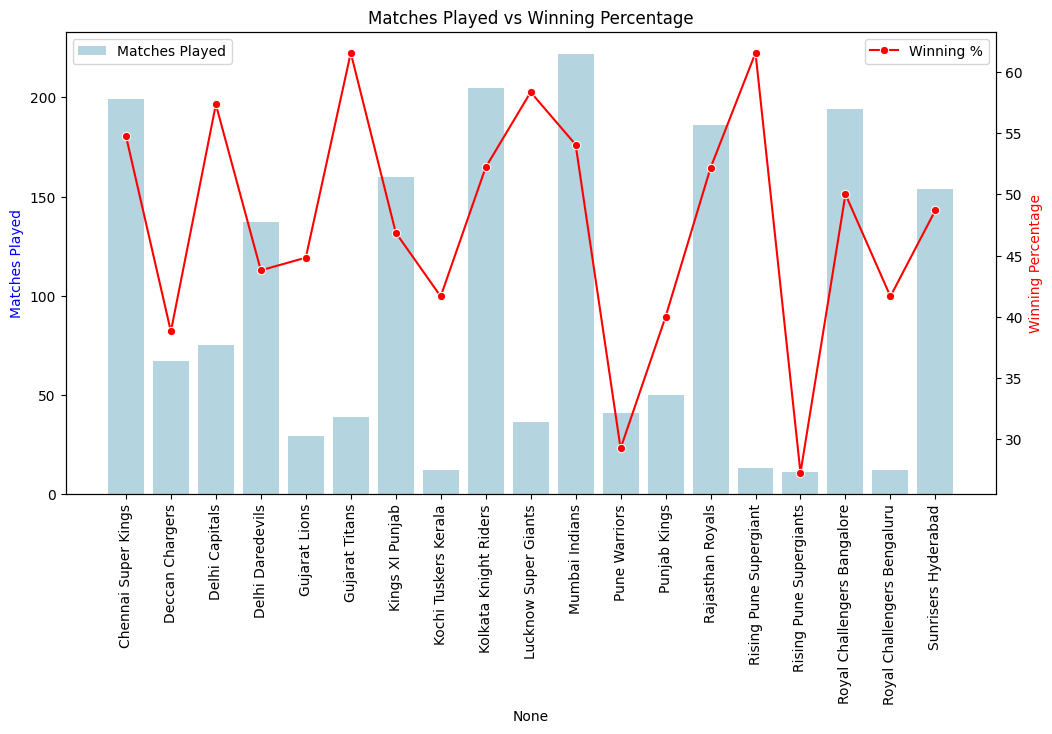

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count total matches played by each team
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()

# Count total matches won by each team
matches_won = matches['winner'].value_counts()

# Calculate Winning Percentage (handle division by zero)
winning_percentage = (matches_won / matches_played) * 100
winning_percentage = winning_percentage.fillna(0)  # Replace NaN with 0 if a team has no wins

# Sort teams alphabetically for consistent order
teams_sorted = sorted(matches_played.index)

# Reorder data according to sorted team names
matches_played = matches_played.reindex(teams_sorted)
winning_percentage = winning_percentage.reindex(teams_sorted)

# Plot Matches Played & Winning Percentage
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Matches Played
sns.barplot(x=matches_played.index, y=matches_played.values, color='lightblue', label="Matches Played", ax=ax1)
ax1.set_ylabel("Matches Played", color="blue")
ax1.set_xticks(range(len(matches_played.index)))  # Ensure correct number of ticks
ax1.set_xticklabels(matches_played.index, rotation=90)  # Now set labels

# Line plot for Winning Percentage
ax2 = ax1.twinx()
sns.lineplot(x=winning_percentage.index, y=winning_percentage.values, color="red", marker="o", label="Winning %", ax=ax2)
ax2.set_ylabel("Winning Percentage", color="red")

plt.title("Matches Played vs Winning Percentage")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


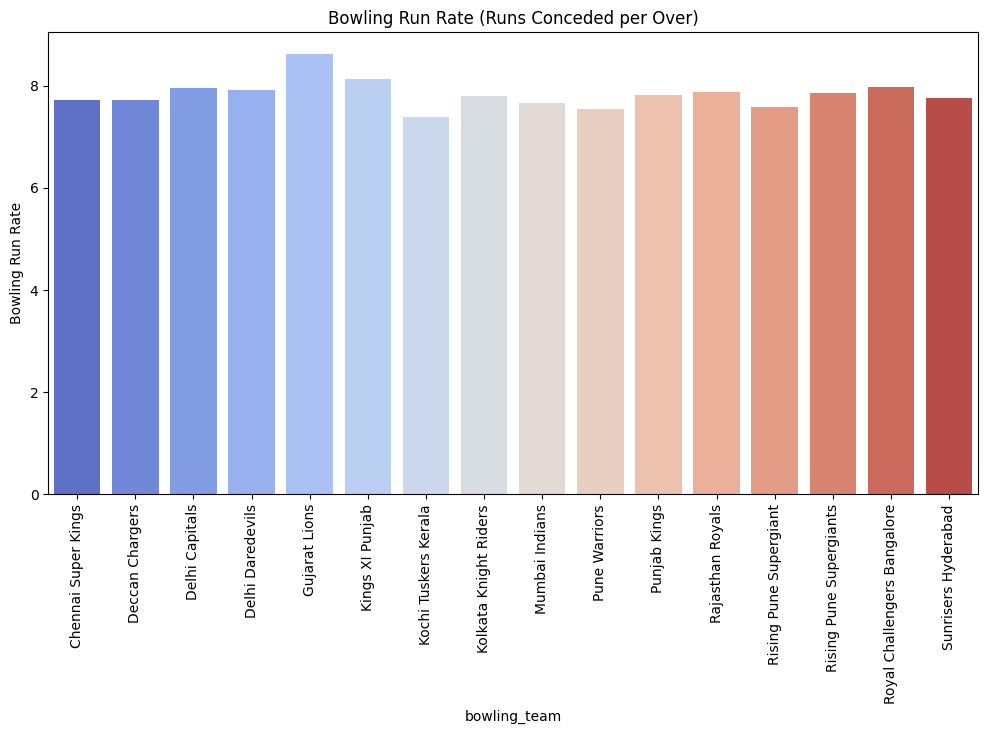

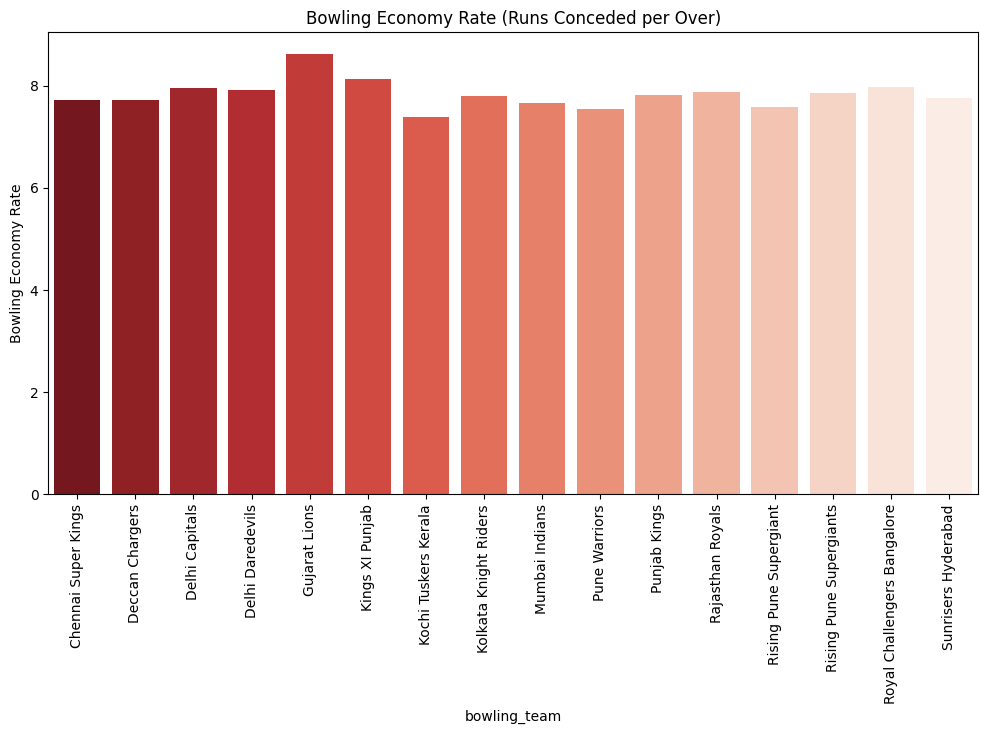

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total runs conceded (bowling side)
runs_conceded = deliveries.groupby('bowling_team')['total_runs'].sum()

# Calculate total overs bowled
balls_bowled = deliveries.groupby('bowling_team')['ball'].count()
overs_bowled = balls_bowled / 6

# Calculate Run Rate (as Bowling Side) -> How many runs a team concedes per over
bowling_run_rate = runs_conceded / overs_bowled

# Calculate Economy Rate (Bowling Side)
economy_rate = runs_conceded / overs_bowled

# 🔹 Plot Bowling Run Rate
plt.figure(figsize=(12, 6))
sns.barplot(x=bowling_run_rate.index, y=bowling_run_rate.values, hue=bowling_run_rate.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Bowling Run Rate")
plt.title("Bowling Run Rate (Runs Conceded per Over)")
plt.show()

# 🔹 Plot Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x=economy_rate.index, y=economy_rate.values, hue=economy_rate.index, palette="Reds_r", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Bowling Economy Rate")
plt.title("Bowling Economy Rate (Runs Conceded per Over)")
plt.show()


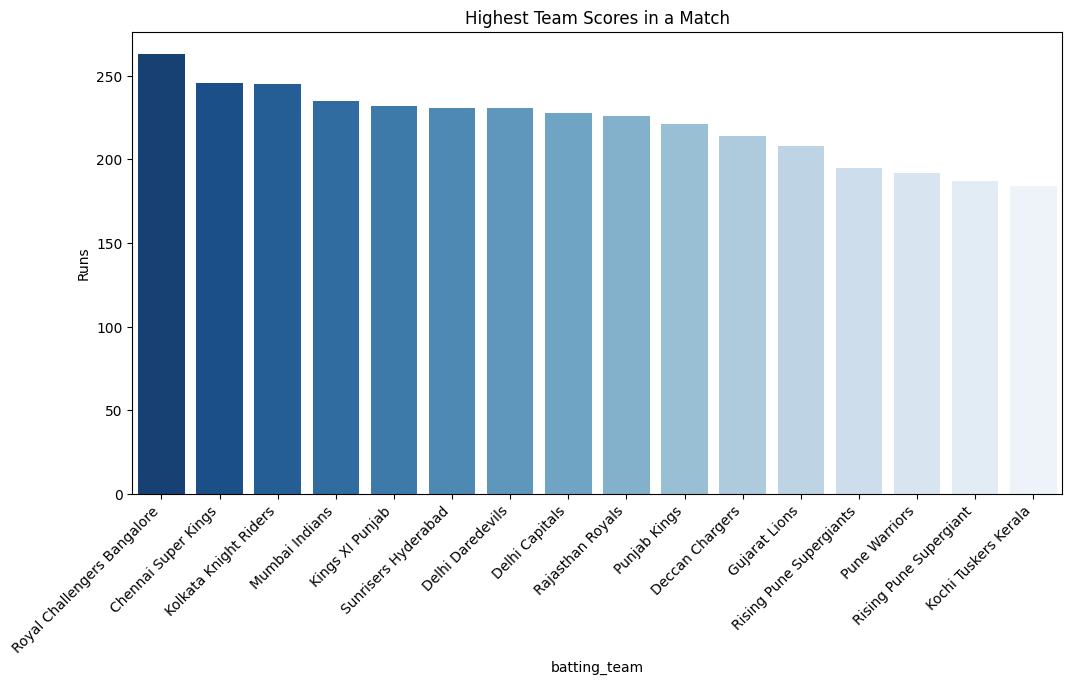

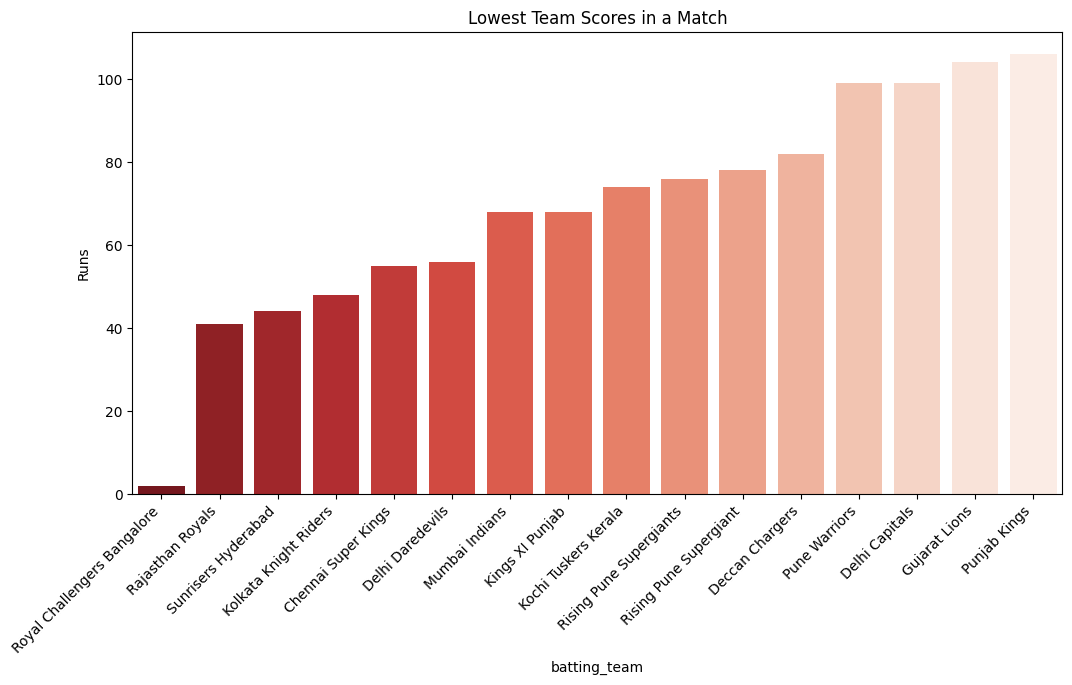

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by match and team, then sum runs to get match-wise total team scores
team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Get Highest Scores
highest_scores = team_scores.groupby('batting_team')['total_runs'].max().sort_values(ascending=False)

# Get Lowest Scores
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min().sort_values(ascending=True)

# Plot Highest Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_scores.index, y=highest_scores.values, hue=highest_scores.index, palette='Blues_r', legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Runs")
plt.title("Highest Team Scores in a Match")
plt.show()

# Plot Lowest Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_scores.index, y=lowest_scores.values, hue=lowest_scores.index, palette='Reds_r', legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Runs")
plt.title("Lowest Team Scores in a Match")
plt.show()



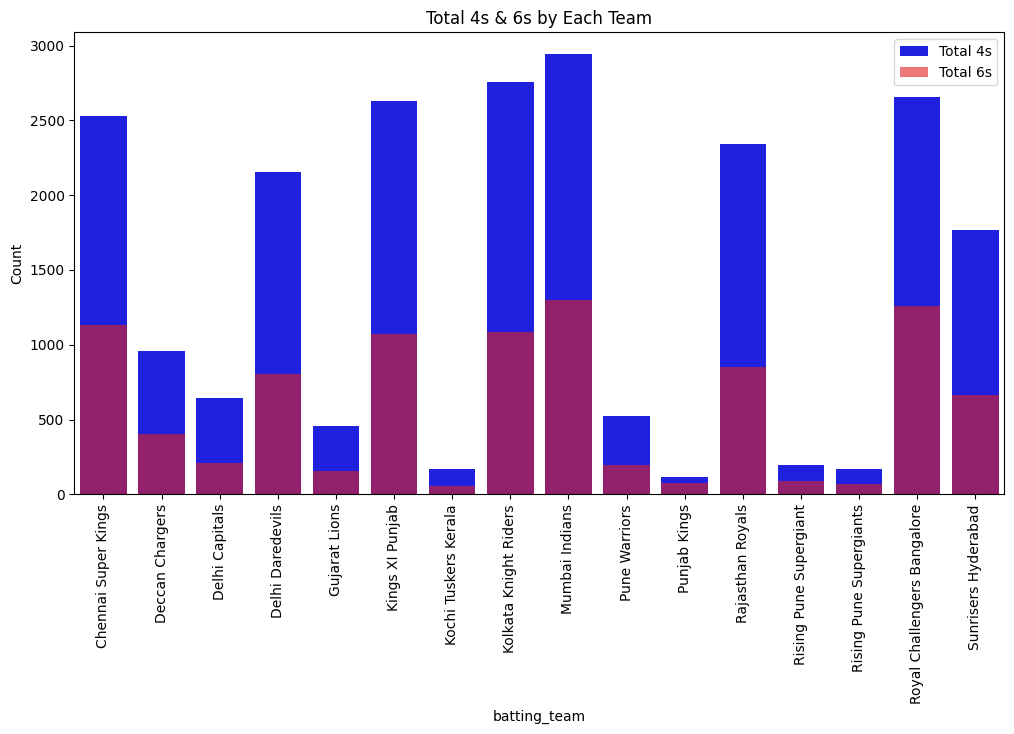

In [ ]:
# Count total 4s hit by each team
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count()

# Count total 6s hit by each team
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count()

# Plot Total 4s and 6s
plt.figure(figsize=(12, 6))
sns.barplot(x=fours.index, y=fours.values, color='blue', label="Total 4s")
sns.barplot(x=sixes.index, y=sixes.values, color='red', alpha=0.6, label="Total 6s")

plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Total 4s & 6s by Each Team")
plt.legend()
plt.show()


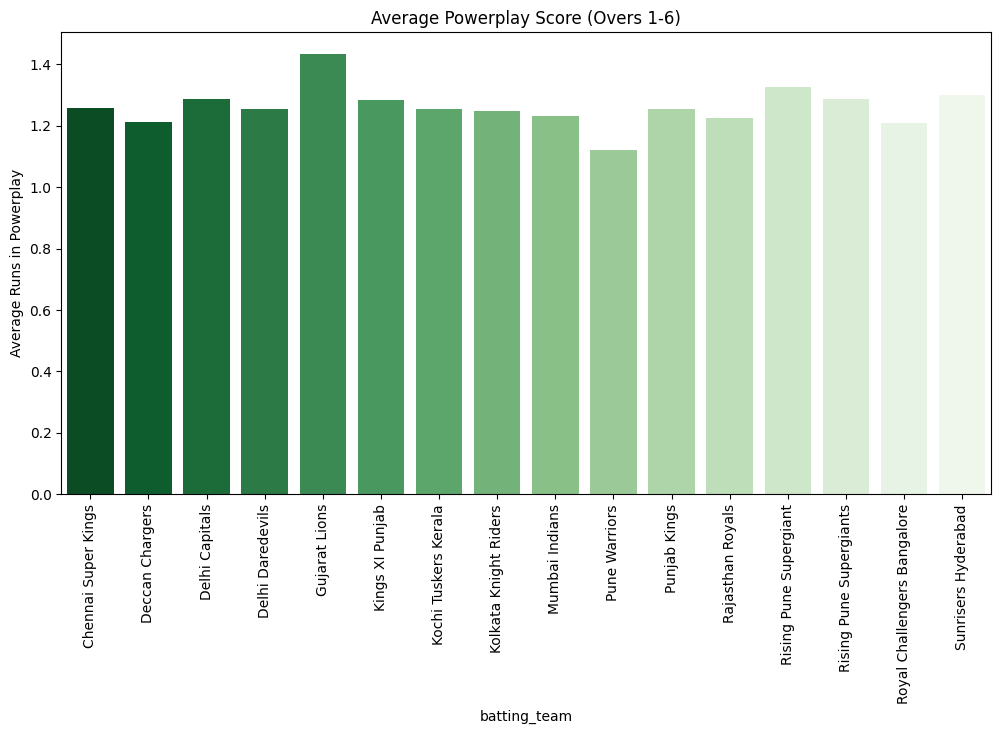

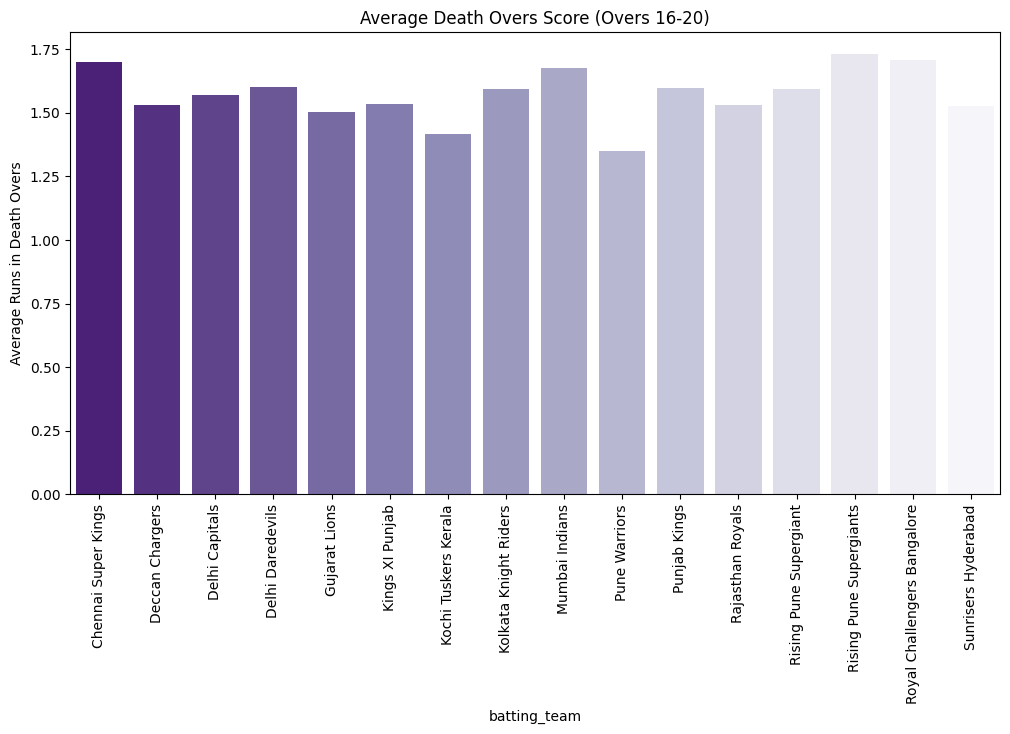

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Powerplay Score (Overs 1-6)
powerplay_scores = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]
avg_powerplay_scores = powerplay_scores.groupby('batting_team')['total_runs'].mean()

#Death Overs Score (Overs 16-20)
death_overs_scores = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)]
avg_death_scores = death_overs_scores.groupby('batting_team')['total_runs'].mean()

#Plot Average Powerplay Score
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_powerplay_scores.index, y=avg_powerplay_scores.values, hue=avg_powerplay_scores.index, palette="Greens_r", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Average Runs in Powerplay")
plt.title("Average Powerplay Score (Overs 1-6)")
plt.show()

#Plot Average Death Overs Score
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_death_scores.index, y=avg_death_scores.values, hue=avg_death_scores.index, palette="Purples_r", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Average Runs in Death Overs")
plt.title("Average Death Overs Score (Overs 16-20)")
plt.show()


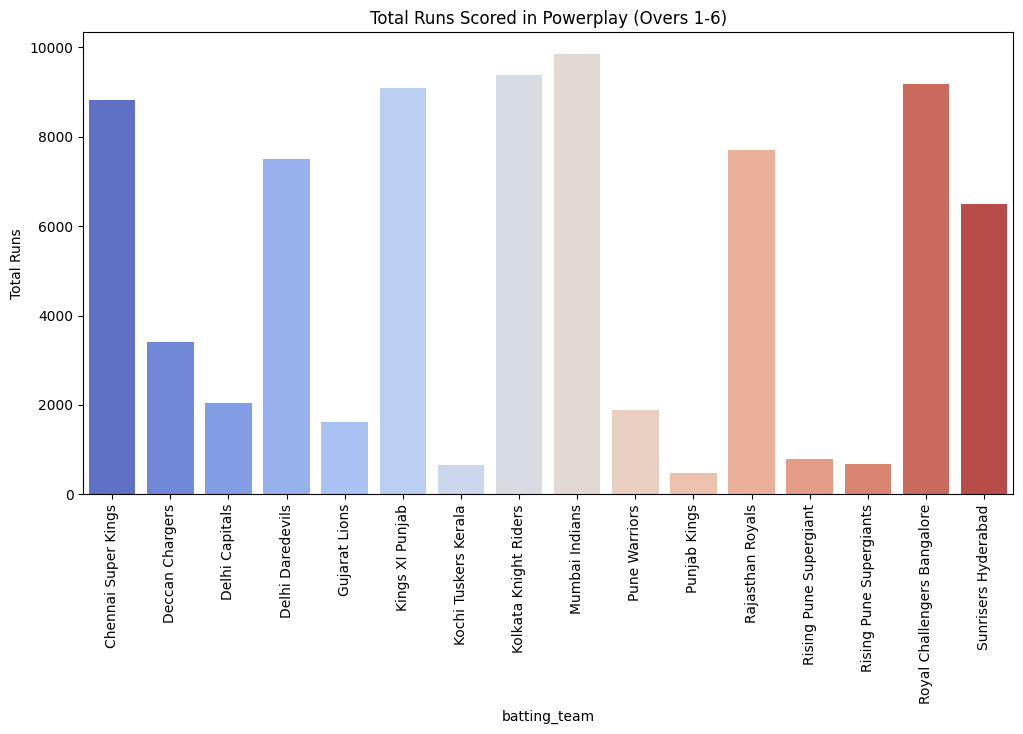

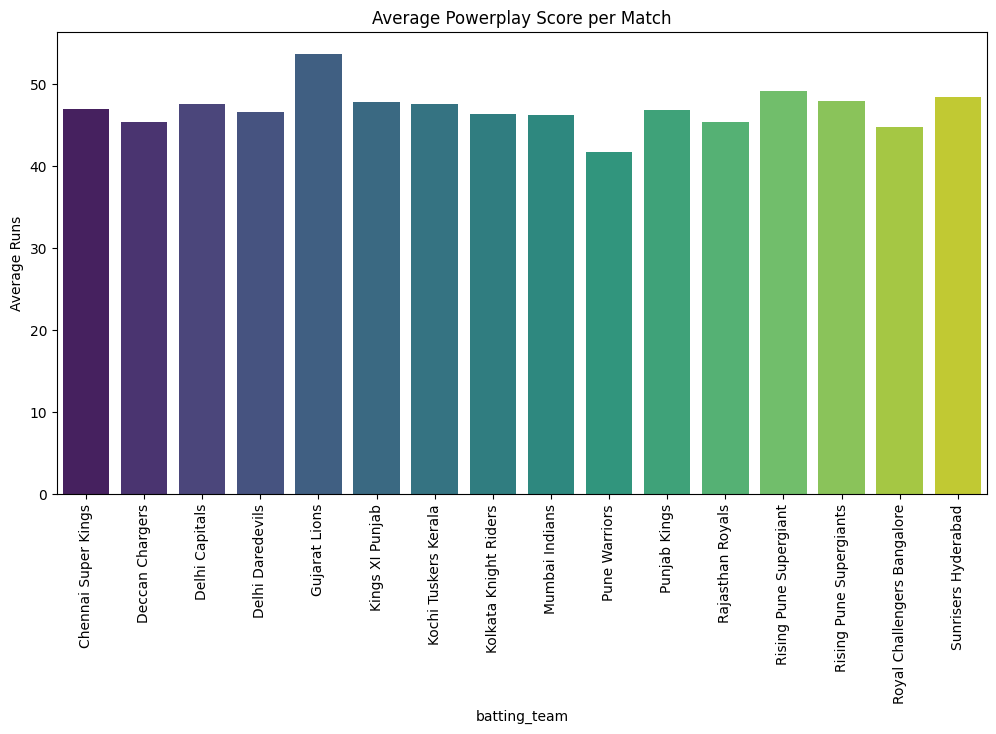

In [ ]:
# Filtering Powerplay Overs (1-6)
powerplay = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]

# Total Runs in Powerplay by Team
total_powerplay_runs = powerplay.groupby('batting_team')['total_runs'].sum().reset_index()

# Average Powerplay Score per Match
avg_powerplay_score = powerplay.groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby('batting_team').mean().reset_index()

# Plot Total Runs in Powerplay
plt.figure(figsize=(12, 6))
sns.barplot(data=total_powerplay_runs, x='batting_team', y='total_runs', hue='batting_team', palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Total Runs")
plt.title("Total Runs Scored in Powerplay (Overs 1-6)")
plt.show()

# Plot Average Powerplay Score per Match
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_powerplay_score, x='batting_team', y='total_runs', hue='batting_team', palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.ylabel("Average Runs")
plt.title("Average Powerplay Score per Match")
plt.show()


**PLAYER PERFORMANCE**

Top 20 Run Scorers:
batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
KL Rahul          4689
AM Rahane         4642
F du Plessis      4571
SV Samson         4419
AT Rayudu         4348
G Gambhir         4217
SR Watson         3880
MK Pandey         3859
SA Yadav          3594
JC Buttler        3583
Name: batsman_runs, dtype: int64


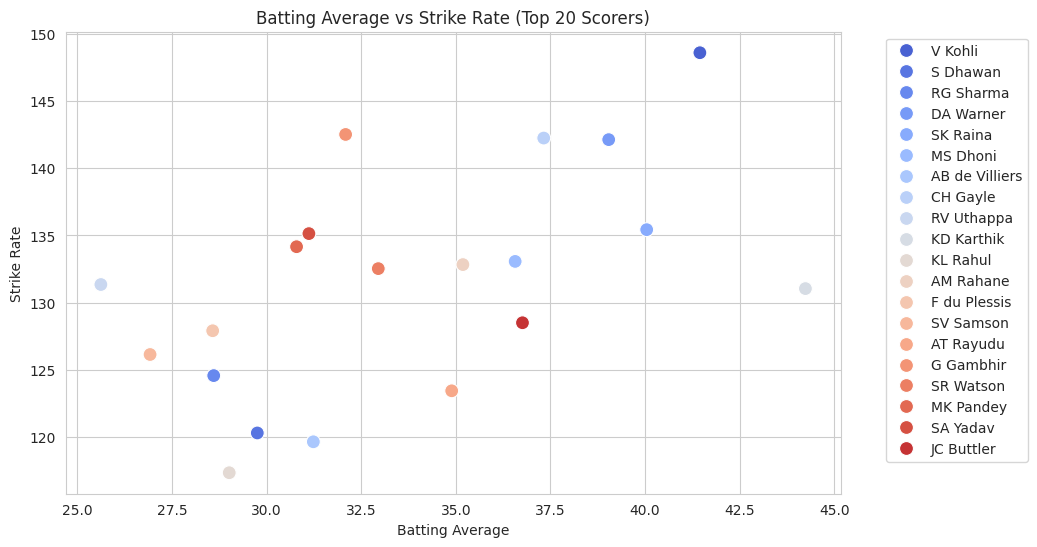

Highest Batting Average: KL Rahul
Highest Strike Rate: AD Russell


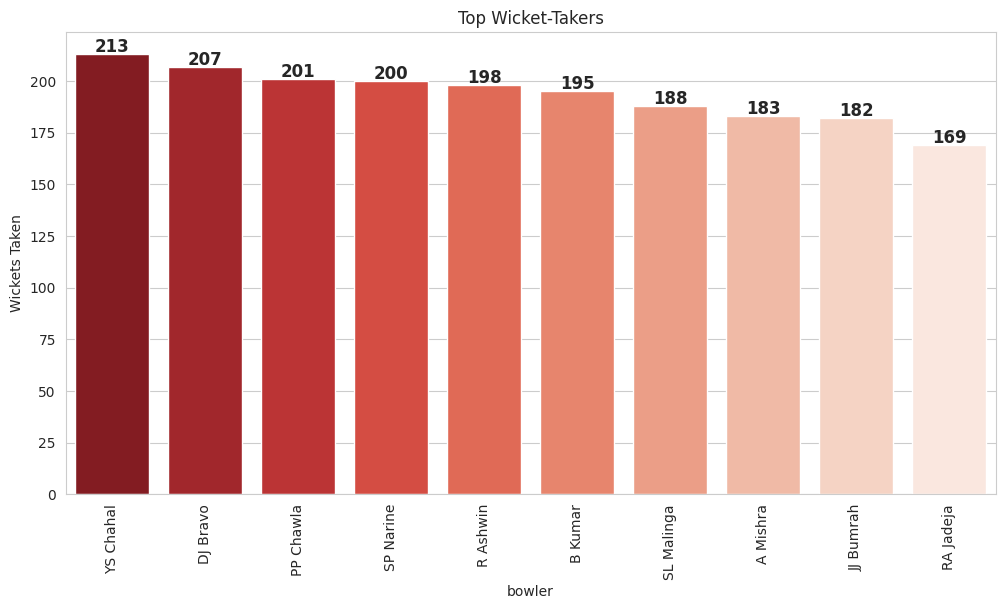

Top Highest Individual Scores:
       match_id          batter  batsman_runs
5302     598027        CH Gayle           175
2        335982     BB McCullum           158
14108   1304112       Q de Kock           140
7528     829795  AB de Villiers           133
11583   1216510        KL Rahul           132
15383   1370352    Shubman Gill           129
8359     980987  AB de Villiers           129
4687     548372        CH Gayle           128
10149   1136602         RR Pant           128
2237     419137         M Vijay           127


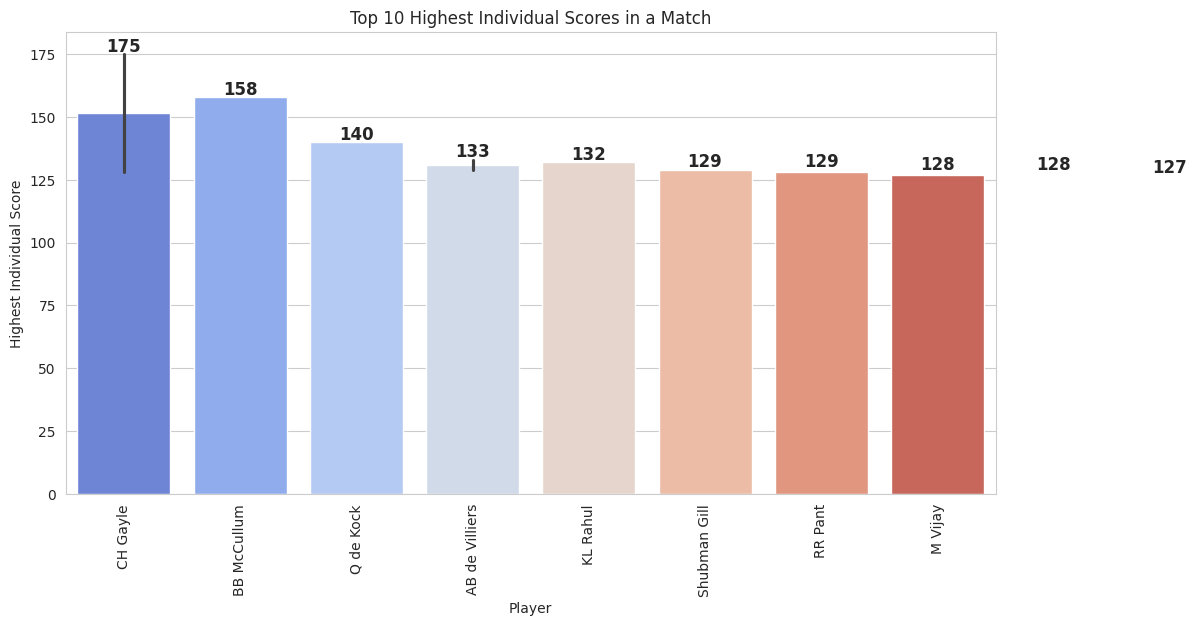

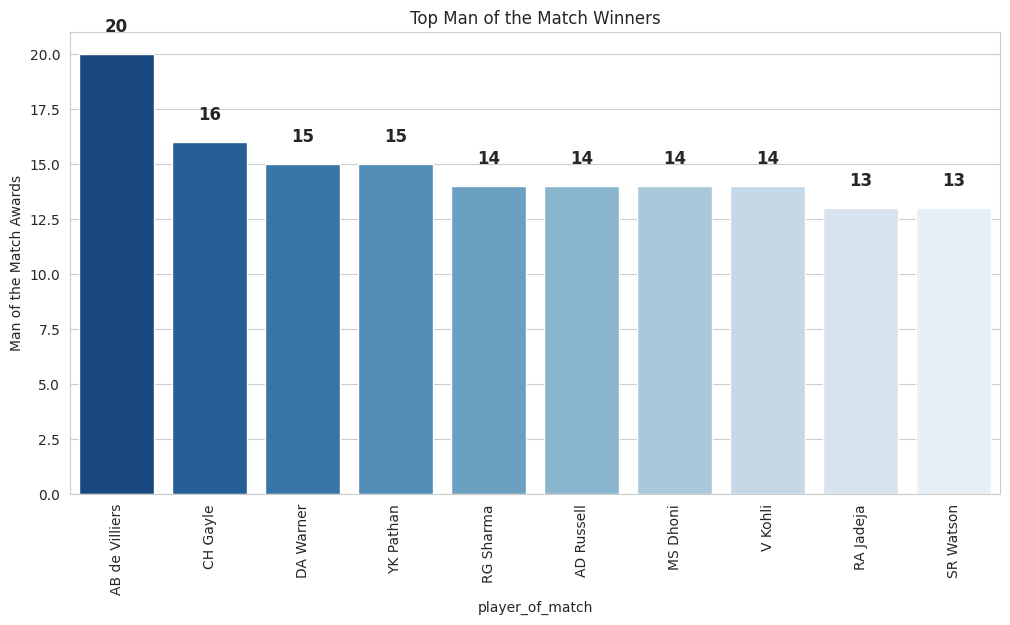

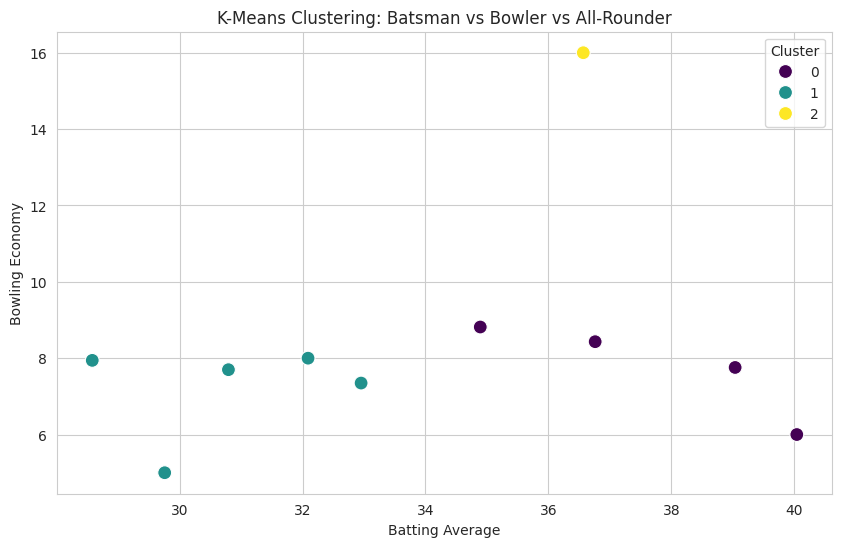

Top 10 Batsmen for 6s:
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64
Top 10 Batsmen for 4s:
batter
S Dhawan        768
V Kohli         708
DA Warner       663
RG Sharma       599
SK Raina        506
G Gambhir       492
RV Uthappa      481
AM Rahane       479
KD Karthik      466
F du Plessis    422
Name: batsman_runs, dtype: int64
Top 10 Batsmen for 2s:
batter
V Kohli           445
DA Warner         370
MS Dhoni          340
S Dhawan          299
SK Raina          271
AB de Villiers    268
RG Sharma         263
KD Karthik        258
AM Rahane         257
G Gambhir         249
Name: batsman_runs, dtype: int64
Top 10 Batsmen for 1s:
batter
V Kohli       2591
S Dhawan      2102
RG Sharma     1996
SK Raina      1708
DA Warner     1682
MS Dhoni      1554
AM Rahane     1537
AT Rayud

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

# Load the datasets
deliveries = pd.read_csv("/content/deliveries_cleaned.csv")
matches = pd.read_csv("/content/matches_cleaned.csv")

# Set Seaborn Style
sns.set_style("whitegrid")

#Get the Top 20 Run Scorers
top_run_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(20)
print("Top 20 Run Scorers:")
print(top_run_scorers)

#Batting Average vs Strike Rate for top 20 run-scorers
balls_faced = deliveries[deliveries['batter'].isin(top_run_scorers.index)].groupby('batter')['ball'].count()
batting_avg = top_run_scorers / deliveries[deliveries['batter'].isin(top_run_scorers.index)].groupby('batter')['is_wicket'].sum()
strike_rate = (top_run_scorers / balls_faced) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(x=batting_avg, y=strike_rate, hue=top_run_scorers.index, palette='coolwarm', s=100)
plt.xlabel("Batting Average")
plt.ylabel("Strike Rate")
plt.title("Batting Average vs Strike Rate (Top 20 Scorers)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Highest Average and Strike Rate for players with >50 matches
player_matches = deliveries.groupby('batter')['match_id'].nunique()
qualified_players = player_matches[player_matches > 50].index
highest_avg = (deliveries[deliveries['batter'].isin(qualified_players)].groupby('batter')['batsman_runs'].sum() /
               deliveries[deliveries['batter'].isin(qualified_players)].groupby('batter')['is_wicket'].sum()).idxmax()
highest_sr = ((deliveries[deliveries['batter'].isin(qualified_players)].groupby('batter')['batsman_runs'].sum() /
               deliveries[deliveries['batter'].isin(qualified_players)].groupby('batter')['ball'].count()) * 100).idxmax()
print("Highest Batting Average:", highest_avg)
print("Highest Strike Rate:", highest_sr)

#Top Wicket-Takers
top_wicket_takers = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, hue=top_wicket_takers.index, palette="Reds_r", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.ylabel("Wickets Taken")
plt.title("Top Wicket-Takers")

# Display count values on bars
for index, value in enumerate(top_wicket_takers.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()

#Top Highest Individual Scores
top_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
top_scores = top_scores.sort_values(by='batsman_runs', ascending=False).head(10)
print("Top Highest Individual Scores:")
print(top_scores)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores['batter'], y=top_scores['batsman_runs'], hue=top_scores['batter'], palette="coolwarm", legend = False)
plt.xticks(rotation=90)
plt.ylabel("Highest Individual Score")
plt.xlabel("Player")
plt.title("Top 10 Highest Individual Scores in a Match")

# Display values on bars
for index, value in enumerate(top_scores['batsman_runs']):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()

#Man of the Match Count Analysis
mom_counts = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=mom_counts.index, y=mom_counts.values, hue=mom_counts.index, palette="Blues_r", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.ylabel("Man of the Match Awards")
plt.title("Top Man of the Match Winners")

# Display values on bars
for index, value in enumerate(mom_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()

#K-Means Clustering (Batsman, Bowler, All-Rounder)
data = pd.DataFrame({
    'Batting Average': batting_avg,
    'Bowling Economy': deliveries.groupby('bowler')['total_runs'].sum() / (deliveries.groupby('bowler')['ball'].count() / 6)
})
data.dropna(inplace=True)
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Batting Average'], y=data['Bowling Economy'], hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel("Batting Average")
plt.ylabel("Bowling Economy")
plt.title("K-Means Clustering: Batsman vs Bowler vs All-Rounder")
plt.show()

#Top 10 Batsmen in Each Run Category
top_6s = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
top_4s = deliveries[deliveries['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
top_2s = deliveries[deliveries['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)
top_1s = deliveries[deliveries['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)

print("Top 10 Batsmen for 6s:")
print(top_6s)
print("Top 10 Batsmen for 4s:")
print(top_4s)
print("Top 10 Batsmen for 2s:")
print(top_2s)
print("Top 10 Batsmen for 1s:")
print(top_1s)


**`SEASONAL ANALYSIS`**

In [ ]:
import pandas as pd
deliveries = pd.read_csv("/content/deliveries_cleaned.csv")
matches = pd.read_csv("/content/matches_cleaned.csv")

# Merge season information into deliveries dataset
deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

#Average Runs per Match per Season
season_runs = matches.groupby('season')['target_runs'].sum()
season_matches = matches.groupby('season')['id'].nunique()
avg_runs_per_match = season_runs / season_matches
print("\nAverage Runs per Match per Season:")
print(avg_runs_per_match)

#Targets of 200+ Runs per Season
targets_200 = matches[matches['target_runs'] >= 200].groupby('season')['id'].count()
print("\nTargets of 200+ Runs per Season:")
print(targets_200)

#Average Score of Each Team per Season
team_avg_scores = deliveries.groupby(['season', 'batting_team'])['total_runs'].sum() / \
                  deliveries.groupby(['season', 'batting_team'])['match_id'].nunique()
print("\nAverage Score of Each Team per Season:")
print(team_avg_scores)

#Runs of Orange Cap Holders per Season
orange_cap = deliveries.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.loc[orange_cap.groupby('season')['batsman_runs'].idxmax()]
print("\nRuns of Orange Cap Holders per Season:")
print(orange_cap)

#Wickets of Purple Cap Holders per Season
purple_cap = deliveries[deliveries['is_wicket'] == 1].groupby(['season', 'bowler'])['is_wicket'].count().reset_index()
purple_cap = purple_cap.loc[purple_cap.groupby('season')['is_wicket'].idxmax()]
print("\nWickets of Purple Cap Holders per Season:")
print(purple_cap)

#Top 10 Bowlers per Season
top_10_bowlers_per_season = deliveries[deliveries['is_wicket'] == 1].groupby(['season', 'bowler'])['is_wicket'].count()
top_10_bowlers_per_season = top_10_bowlers_per_season.groupby('season', group_keys=False).nlargest(10)
print("\nTop 10 Bowlers per Season:")
print(top_10_bowlers_per_season)



Average Runs per Match per Season:
season
2007/08    159.717391
2009       148.166667
2009/10    163.461538
2011       152.593220
2012       155.769231
2013       152.245902
2014       163.653846
2015       165.734694
2016       161.480769
2017       169.220000
2018       168.000000
2019       169.425926
2020/21    163.361702
2021       156.351852
2022       171.142857
2023       178.254237
2024       180.711864
dtype: float64

Targets of 200+ Runs per Season:
season
2007/08     4
2009/10     3
2011        1
2012        3
2013        1
2014        4
2015        4
2016        1
2017        5
2018        5
2019        6
2020/21     5
2021        4
2022       10
2023       16
2024       18
Name: id, dtype: int64

Average Score of Each Team per Season:
season   batting_team               
2007/08  Chennai Super Kings            158.928571
         Deccan Chargers                159.214286
         Delhi Daredevils               159.416667
         Kings XI Punjab                160.000000

**FEATURE EXTRACTION**

In [ ]:
import pandas as pd
matches = pd.read_csv("/content/matches_cleaned.csv")
deliveries = pd.read_csv("/content/deliveries_cleaned.csv")

# Win by runs and wickets
matches['win_by_runs'] = matches.apply(lambda x: x['result_margin'] if x['result'] == 'runs' else 0, axis=1)
matches['win_by_wickets'] = matches.apply(lambda x: x['result_margin'] if x['result'] == 'wickets' else 0, axis=1)

# Toss impact on match outcome
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']

# Win percentage per team per season
team_wins_per_season = matches.groupby(['season', 'winner']).size().reset_index(name='wins')
matches_played_per_season = matches.groupby(['season', 'team1']).size().reset_index(name='matches_played')
team_win_percentage = team_wins_per_season.merge(matches_played_per_season, left_on=['season', 'winner'], right_on=['season', 'team1'])
team_win_percentage['win_percentage'] = (team_win_percentage['wins'] / team_win_percentage['matches_played']) * 100
team_win_percentage = team_win_percentage[['season', 'winner', 'win_percentage']]

# Venue-based winning trends
venue_wins = matches.groupby(['venue', 'winner']).size().reset_index(name='wins')
venue_winning_trend = venue_wins.pivot(index='venue', columns='winner', values='wins').fillna(0)

# Selecting important match features
match_features = matches[['season', 'venue', 'match_type', 'team1', 'team2', 'toss_winner', 'toss_decision',
                          'winner', 'target_runs', 'target_overs', 'win_by_runs', 'win_by_wickets', 'toss_win_match_win']]

print("Extracted Features from matches.csv:")
print(match_features.head())

# Merge season info from matches
deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Feature Engineering
deliveries['boundary'] = deliveries['batsman_runs'].apply(lambda x: 1 if x in [4, 6] else 0)
deliveries['dot_ball'] = deliveries['total_runs'].apply(lambda x: 1 if x == 0 else 0)
deliveries['over_category'] = deliveries['over'].apply(lambda x: 'Powerplay' if x <= 6 else ('Middle Overs' if x <= 15 else 'Death Overs'))

# Aggregating Key Features
delivery_features = deliveries.groupby(['season', 'batting_team']).agg({
    'batsman_runs': 'sum',
    'boundary': 'sum',
    'dot_ball': 'sum',
    'is_wicket': 'sum'
}).reset_index()

# All-rounder contributions (batting + bowling impact)
all_rounders = deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'is_wicket': 'sum'
}).rename(columns={'batsman_runs': 'Total Runs', 'is_wicket': 'Wickets'}).reset_index()
all_rounders = all_rounders[all_rounders['Total Runs'] > 500]  # Filtering significant all-rounders

# Death over performances (runs & wickets in last 5 overs)
death_overs = deliveries[deliveries['over'] > 15]
death_over_stats = death_overs.groupby('batting_team').agg({
    'batsman_runs': 'sum',
    'is_wicket': 'sum'
}).rename(columns={'batsman_runs': 'Death Overs Runs', 'is_wicket': 'Death Overs Wickets'}).reset_index()

print("Extracted Features from deliveries.csv:")
print(delivery_features.head())


Extracted Features from matches.csv:
    season                                      venue match_type  \
0  2007/08                           Feroz Shah Kotla     League   
1  2007/08                           Wankhede Stadium     League   
2  2007/08                               Eden Gardens     League   
3  2007/08                     Sawai Mansingh Stadium     League   
4  2007/08  Rajiv Gandhi International Stadium, Uppal     League   

                   team1                        team2       toss_winner  \
0       Delhi Daredevils             Rajasthan Royals  Rajasthan Royals   
1         Mumbai Indians  Royal Challengers Bangalore    Mumbai Indians   
2  Kolkata Knight Riders              Deccan Chargers   Deccan Chargers   
3       Rajasthan Royals              Kings XI Punjab   Kings XI Punjab   
4        Deccan Chargers             Delhi Daredevils   Deccan Chargers   

  toss_decision                       winner  target_runs  target_overs  \
0           bat             

**MODEL TRAINING AND PERFORMANCE METRICS**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

matches = pd.read_csv("/content/matches_cleaned.csv")
deliveries = pd.read_csv("/content/deliveries_cleaned.csv")

#Feature Engineering
matches['win_by_runs'] = matches.apply(lambda x: x['result_margin'] if x['result'] == 'runs' else 0, axis=1)
matches['win_by_wickets'] = matches.apply(lambda x: x['result_margin'] if x['result'] == 'wickets' else 0, axis=1)
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']

#Selecting Features
match_features = matches[['season', 'venue', 'match_type', 'team1', 'team2', 'toss_winner', 'toss_decision',
                          'winner', 'target_runs', 'target_overs', 'win_by_runs', 'win_by_wickets', 'toss_win_match_win']]

# Convert 'season' to integer for scaling
match_features.loc[:, 'season'] = match_features['season'].astype(str).str[:4].astype(int)

#Encoding Categorical Features
encoder = LabelEncoder()
categorical_cols = ['venue', 'match_type', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']
for col in categorical_cols:
    match_features.loc[:, col] = encoder.fit_transform(match_features[col])

#Defining Features & Target Variable
X = match_features.drop(columns=['winner'])  # Features
y = match_features['winner']  # Target (Winner)

# Ensure target variable is discrete (no continuous values)
if y.dtype != 'int':
    y = y.astype('category').cat.codes  # Convert any categorical target to numeric values

#Resampling using RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

#Splitting the Resampled Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Standardizing Numeric Features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

#Model Training (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluating Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1 Score: {f1:.4f}")


Model Accuracy: 0.8979
Model Precision: 0.9017
Model Recall: 0.8979
Model F1 Score: 0.8941


**PREDICTION**

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Re-Fit LabelEncoder on Full Data (including 2025 Final)
all_venues = matches['venue'].tolist() + ['Eden Gardens']
all_teams = list(set(matches['team1'].tolist() + matches['team2'].tolist())) + ['Kolkata Knight Riders', 'Chennai Super Kings']
all_match_types = matches['match_type'].tolist() + ['Final']
encoder_venue = LabelEncoder()
encoder_teams = LabelEncoder()
encoder_decision = LabelEncoder()
encoder_match_type = LabelEncoder()
encoder_venue.fit(all_venues)
encoder_teams.fit(all_teams)
encoder_decision.fit(matches['toss_decision'])
encoder_match_type.fit(all_match_types)

#Manually Create a DataFrame for the 2025 Final
final_2025 = pd.DataFrame({
    'season': [2025],
    'venue': ['Eden Gardens'],
    'match_type': ['Final'],
    'team1': ['Kolkata Knight Riders'],
    'team2': ['Chennai Super Kings'],
    'toss_winner': ['Kolkata Knight Riders'],
    'toss_decision': ['bat'],
    'target_runs': [180],
    'target_overs': [20],
    'win_by_runs': [0],
    'win_by_wickets': [0],
    'toss_win_match_win': [1]
})

#Apply Encoding Before Scaling
final_2025['venue'] = encoder_venue.transform(final_2025['venue'])
final_2025['match_type'] = encoder_match_type.transform(final_2025['match_type'])
final_2025['team1'] = encoder_teams.transform(final_2025['team1'])
final_2025['team2'] = encoder_teams.transform(final_2025['team2'])
final_2025['toss_winner'] = encoder_teams.transform(final_2025['toss_winner'])
final_2025['toss_decision'] = encoder_decision.transform(final_2025['toss_decision'])

#Standardize Only Numeric Columns
final_2025 = pd.DataFrame(scaler.transform(final_2025), columns=final_2025.columns)

#Predict the Winner
predicted_winner = model.predict(final_2025)
predicted_winner = encoder_teams.inverse_transform(predicted_winner)

print(f"Predicted Winner:{predicted_winner[0]}")


Predicted Winner:Lucknow Super Giants
